In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from scipy import stats

In [3]:
df = pd.read_csv("properties_data.csv")
df.head()

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1905 non-null   int64  
 1   neighborhood         1905 non-null   object 
 2   latitude             1905 non-null   float64
 3   longitude            1905 non-null   float64
 4   price                1905 non-null   int64  
 5   size_in_sqft         1905 non-null   int64  
 6   price_per_sqft       1905 non-null   float64
 7   no_of_bedrooms       1905 non-null   int64  
 8   no_of_bathrooms      1905 non-null   int64  
 9   quality              1905 non-null   object 
 10  maid_room            1905 non-null   bool   
 11  unfurnished          1905 non-null   bool   
 12  balcony              1905 non-null   bool   
 13  barbecue_area        1905 non-null   bool   
 14  built_in_wardrobes   1905 non-null   bool   
 15  central_ac           1905 non-null   b

In [5]:
df.describe()

,id,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms
count,1.905000e+03,1905.000000,1905.000000,1.905000e+03,1905.000000,1905.000000,1905.000000,1905.000000
mean,7.573308e+06,25.116538,55.212338,2.085830e+06,1417.050394,1327.243785,1.793176,2.512861
std,1.925252e+05,0.062647,0.068794,2.913200e+06,891.487639,668.473559,0.949489,1.063117
min,5.528049e+06,24.865992,55.069311,2.200000e+05,294.000000,361.870000,0.000000,1.000000
25%,7.560167e+06,25.072791,55.145389,8.900000e+05,840.000000,870.920000,1.000000,2.000000
50%,7.631829e+06,25.096700,55.207506,1.400000e+06,1271.000000,1169.590000,2.000000,2.000000
75%,7.670328e+06,25.188130,55.271797,2.200000e+06,1703.000000,1622.500000,2.000000,3.000000
max,7.706643e+06,25.273623,55.441623,3.500000e+07,9576.000000,4805.870000,5.000000,6.000000


In [6]:
missing_values = df.isnull().sum()
print(missing_values)

id                     0
neighborhood           0
latitude               0
longitude              0
price                  0
size_in_sqft           0
price_per_sqft         0
no_of_bedrooms         0
no_of_bathrooms        0
quality                0
maid_room              0
unfurnished            0
balcony                0
barbecue_area          0
built_in_wardrobes     0
central_ac             0
childrens_play_area    0
childrens_pool         0
concierge              0
covered_parking        0
kitchen_appliances     0
lobby_in_building      0
maid_service           0
networked              0
pets_allowed           0
private_garden         0
private_gym            0
private_jacuzzi        0
private_pool           0
security               0
shared_gym             0
shared_pool            0
shared_spa             0
study                  0
vastu_compliant        0
view_of_landmark       0
view_of_water          0
walk_in_closet         0
dtype: int64


In [7]:
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


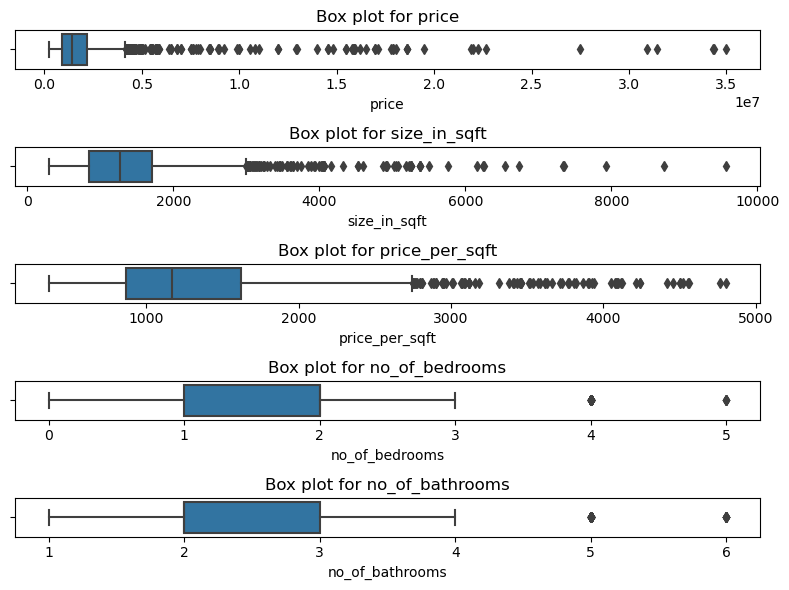

In [8]:
numerical_features = ['price', 'size_in_sqft', 'price_per_sqft', 'no_of_bedrooms', 'no_of_bathrooms']
fig, axes = plt.subplots(nrows=len(numerical_features), figsize=(8, 6))

# Iterate through numerical features and create box plots
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Box plot for {feature}')

plt.tight_layout()
plt.show()

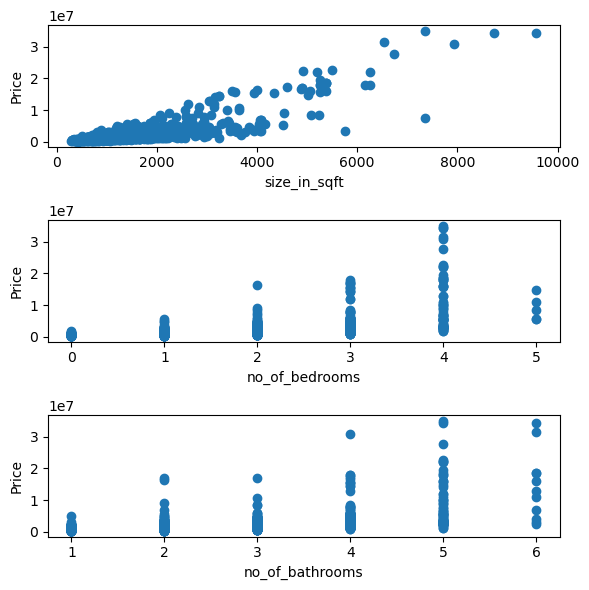

In [9]:
# Scatter plots for selected numerical features vs. price
plt.figure(figsize=(6, 6))
selected_numerical_features = ['size_in_sqft', 'no_of_bedrooms', 'no_of_bathrooms']
for i, feature in enumerate(selected_numerical_features):
    plt.subplot(3, 1, i+1)
    plt.scatter(df[feature], df['price'])
    plt.xlabel(feature)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [10]:
corr_matrix = df[['no_of_bedrooms','no_of_bathrooms','size_in_sqft','price']].corr()
corr_matrix

,no_of_bedrooms,no_of_bathrooms,size_in_sqft,price
no_of_bedrooms,1.000000,0.854384,0.775113,0.514151
no_of_bathrooms,0.854384,1.000000,0.725397,0.502263
size_in_sqft,0.775113,0.725397,1.000000,0.808595
price,0.514151,0.502263,0.808595,1.000000


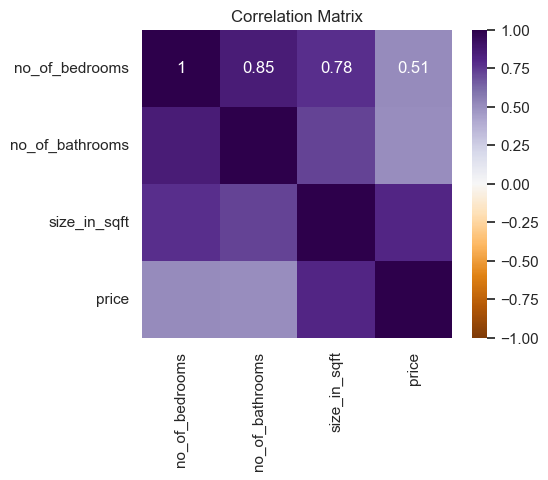

In [26]:
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='PuOr')
plt.title('Correlation Matrix')
plt.show()

C:\Users\Insha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Insha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


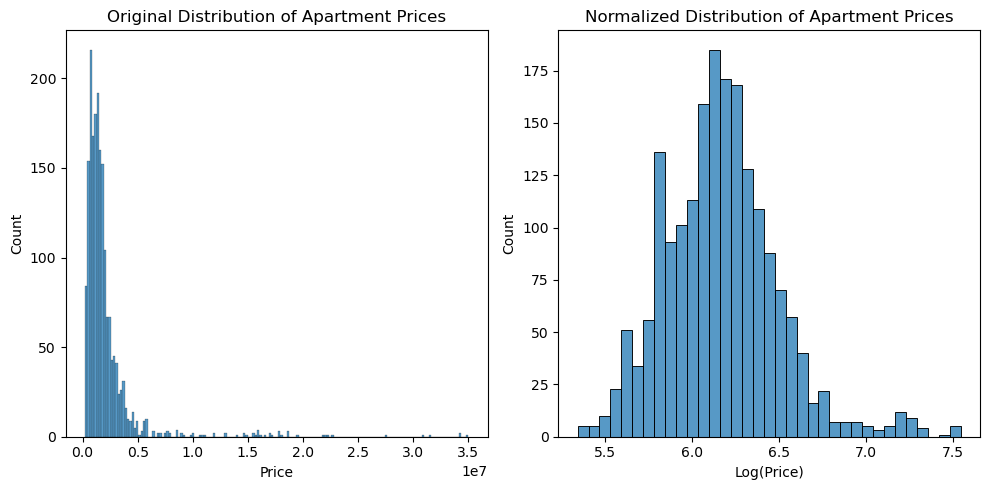

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data=df, x='price', ax=axes[0])
axes[0].set_title("Original Distribution of Apartment Prices")
axes[0].set_xlabel("Price")
axes[0].set_ylabel("Count")

df['log_price'] = np.log10(df['price'])
sns.histplot(data=df, x='log_price', ax=axes[1])
axes[1].set_title("Normalized Distribution of Apartment Prices")
axes[1].set_xlabel("Log(Price)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

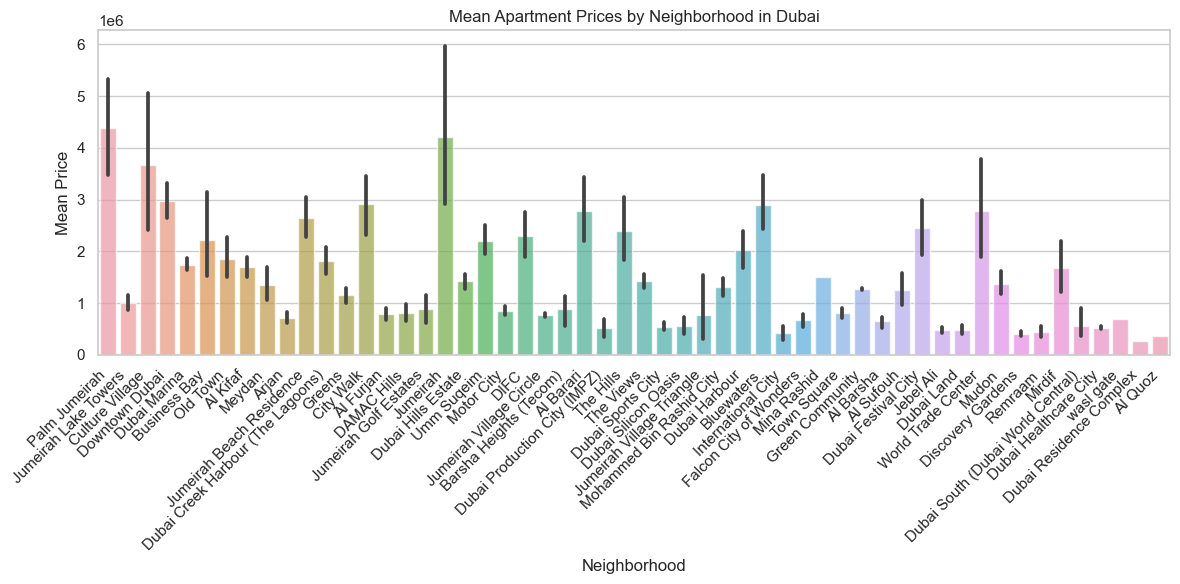

In [15]:
sns.set(style="whitegrid")

# Plot bar plot of mean apartment prices by neighborhood
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='neighborhood', y='price', alpha=0.7)
plt.title("Mean Apartment Prices by Neighborhood in Dubai")
plt.xlabel("Neighborhood")
plt.ylabel("Mean Price")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

C:\Users\Insha\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


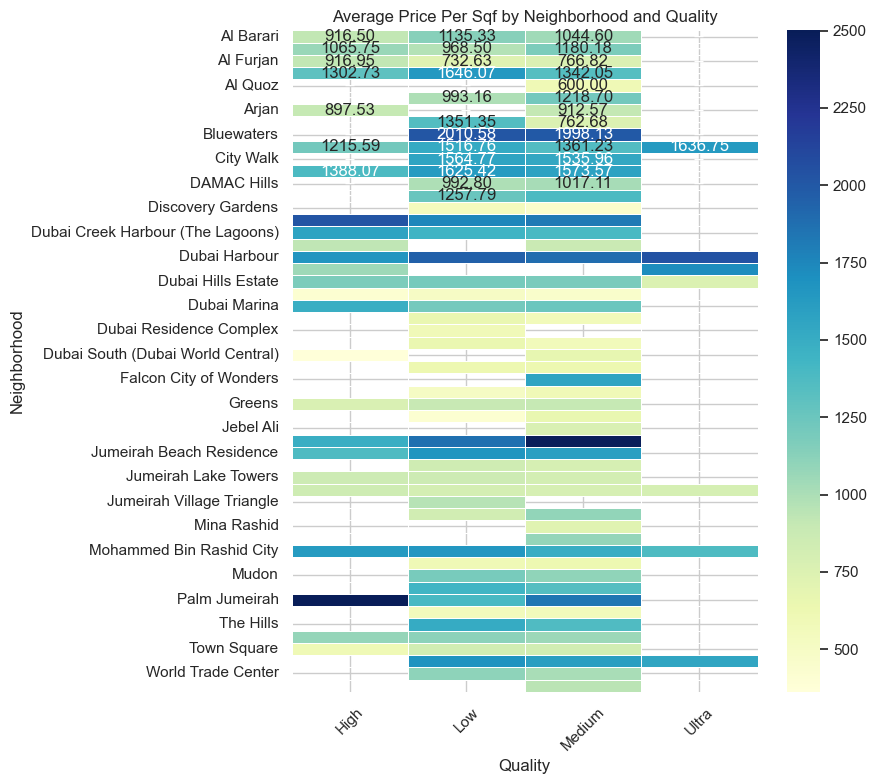

In [22]:
heatmap_data = df.groupby(['neighborhood', 'quality']).mean()['price_per_sqft'].unstack()

# Plot heatmap
plt.figure(figsize=(9, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Average Price Per Sqf by Neighborhood and Quality')
plt.xlabel('Quality')
plt.ylabel('Neighborhood')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

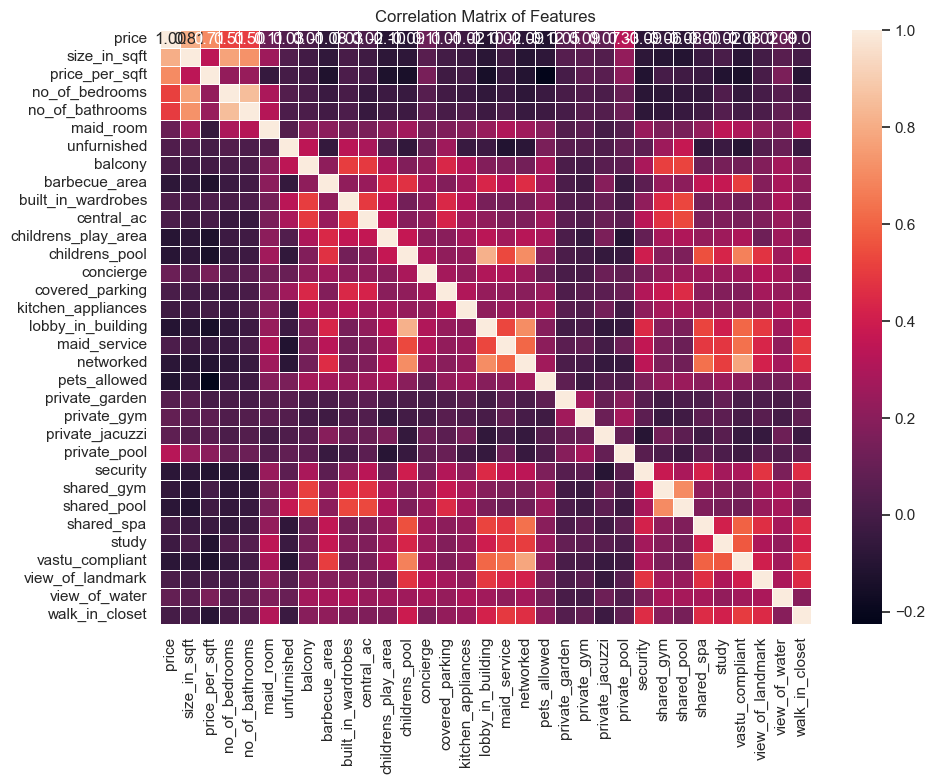

In [35]:
df = df.drop(columns=['log_price'], errors='ignore')

# Select boolean and numeric columns excluding 'id', 'latitude', 'longitude', and 'log_price'
bool_numeric_columns = df.drop(columns=['id', 'latitude', 'longitude']).select_dtypes(include=['bool', 'int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = bool_numeric_columns.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

In [37]:
import folium

# Create a map centered around Dubai
dubai_map = folium.Map(location=[25.276987, 55.296249], zoom_start=11)

# Add markers for each property
for index, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=f"AED {row['price']:,}").add_to(dubai_map)

# Display the map
dubai_map


In [39]:
# Latitude and longitude coordinates of landmarks
landmarks = {
    'Burj Khalifa': (25.1972, 55.2744),
    'Burj al Arab': (25.1413, 55.1850),
    'Dubai Frame': (25.2379, 55.2963),
    'Dubai Marina': (25.0760, 55.1374),
    'Museum of the Future': (25.2048, 55.2708),
    'Dubai Creek': (25.2550, 55.3203),
    'Palm Jumeirah': (25.1125, 55.1381),
    'JBR': (25.0800, 55.1369)
}

# Define function to calculate distance using Haversine formula
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) * np.sin(dlat / 2) + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) * np.sin(dlon / 2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

# Calculate distance from landmarks for each property
for landmark, coordinates in landmarks.items():
    df[f'distance_to_{landmark.replace(" ", "_").lower()}'] = df.apply(lambda row: haversine_distance(row['latitude'], row['longitude'], coordinates[0], coordinates[1]), axis=1)
print(df.head())

        id          neighborhood   latitude  longitude    price  size_in_sqft  \
0  5528049         Palm Jumeirah  25.113208  55.138932  2700000          1079   
1  6008529         Palm Jumeirah  25.106809  55.151201  2850000          1582   
2  6034542  Jumeirah Lake Towers  25.063302  55.137728  1150000          1951   
3  6326063       Culture Village  25.227295  55.341761  2850000          2020   
4  6356778         Palm Jumeirah  25.114275  55.139764  1729200           507   

   price_per_sqft  no_of_bedrooms  no_of_bathrooms quality  ...  \
0         2502.32               1                2  Medium  ...   
1         1801.52               2                2  Medium  ...   
2          589.44               3                5  Medium  ...   
3         1410.89               2                3     Low  ...   
4         3410.65               0                1  Medium  ...   

   view_of_water  walk_in_closet  distance_to_burj_khalifa  \
0           True           False                

In [43]:
column_names = df.columns.tolist()
print(column_names)

['id', 'neighborhood', 'latitude', 'longitude', 'price', 'size_in_sqft', 'price_per_sqft', 'no_of_bedrooms', 'no_of_bathrooms', 'quality', 'maid_room', 'unfurnished', 'balcony', 'barbecue_area', 'built_in_wardrobes', 'central_ac', 'childrens_play_area', 'childrens_pool', 'concierge', 'covered_parking', 'kitchen_appliances', 'lobby_in_building', 'maid_service', 'networked', 'pets_allowed', 'private_garden', 'private_gym', 'private_jacuzzi', 'private_pool', 'security', 'shared_gym', 'shared_pool', 'shared_spa', 'study', 'vastu_compliant', 'view_of_landmark', 'view_of_water', 'walk_in_closet', 'distance_to_burj_khalifa', 'distance_to_burj_al_arab', 'distance_to_dubai_frame', 'distance_to_dubai_marina', 'distance_to_museum_of_the_future', 'distance_to_dubai_creek', 'distance_to_palm_jumeirah', 'distance_to_jbr']


In [62]:
import pandas as pd
from scipy.stats import spearmanr

# Select numerical variables for correlation analysis
numerical_variables = [
    'price',
    'size_in_sqft',
    'price_per_sqft',
    'no_of_bedrooms',
    'no_of_bathrooms',
    'distance_to_burj_khalifa',
    'distance_to_burj_al_arab',
    'distance_to_dubai_frame',
    'distance_to_dubai_marina',
    'distance_to_museum_of_the_future',
    'distance_to_dubai_creek',
    'distance_to_palm_jumeirah',
    'distance_to_jbr'
]

# Compute Spearman correlation coefficients
spearman_corr = pd.DataFrame(index=numerical_variables, columns=numerical_variables)
for col1 in numerical_variables:
    for col2 in numerical_variables:
        spearman_corr.loc[col1, col2] = spearmanr(df[col1], df[col2]).correlation

# Display Spearman correlation coefficients
print("Spearman Correlation Coefficients:")
print(spearman_corr)

Spearman Correlation Coefficients:
                                     price size_in_sqft price_per_sqft  \
price                                  1.0      0.77089       0.669359   
size_in_sqft                       0.77089          1.0       0.093441   
price_per_sqft                    0.669359     0.093441            1.0   
no_of_bedrooms                    0.699238      0.87901       0.119397   
no_of_bathrooms                   0.645778      0.79081       0.125097   
distance_to_burj_khalifa         -0.308652    -0.100496      -0.395633   
distance_to_burj_al_arab         -0.202024    -0.157364      -0.126319   
distance_to_dubai_frame           -0.32513    -0.118821       -0.39885   
distance_to_dubai_marina          0.032894    -0.052378       0.139707   
distance_to_museum_of_the_future -0.332062    -0.120212      -0.409723   
distance_to_dubai_creek          -0.294863    -0.104569      -0.367462   
distance_to_palm_jumeirah        -0.083098    -0.117002       0.023436   
dis

In [63]:
from scipy.stats import kendalltau

# Compute Kendall correlation coefficients
kendall_corr = pd.DataFrame(index=numerical_variables, columns=numerical_variables)
for col1 in numerical_variables:
    for col2 in numerical_variables:
        kendall_corr.loc[col1, col2] = kendalltau(df[col1], df[col2]).correlation

# Display Kendall correlation coefficients
print("\nKendall Correlation Coefficients:")
print(kendall_corr)



Kendall Correlation Coefficients:
                                     price size_in_sqft price_per_sqft  \
price                                  1.0     0.575808       0.487686   
size_in_sqft                      0.575808          1.0       0.061275   
price_per_sqft                    0.487686     0.061275            1.0   
no_of_bedrooms                    0.571873     0.756578       0.090024   
no_of_bathrooms                   0.515275     0.660424       0.093726   
distance_to_burj_khalifa         -0.209589    -0.067017      -0.272311   
distance_to_burj_al_arab         -0.137787     -0.10486      -0.086096   
distance_to_dubai_frame          -0.220549    -0.079149      -0.272551   
distance_to_dubai_marina          0.022306    -0.033487       0.091208   
distance_to_museum_of_the_future -0.226242    -0.080636      -0.281909   
distance_to_dubai_creek          -0.198999     -0.06967      -0.248511   
distance_to_palm_jumeirah        -0.060154    -0.078432       0.012689   
dis

In [44]:
numerical_features = ['price', 'size_in_sqft', 'price_per_sqft', 'no_of_bedrooms', 'no_of_bathrooms']

# Calculate z-scores
z_scores = stats.zscore(df[numerical_features])

# Absolute z-scores
abs_z_scores = np.abs(z_scores)

# Threshold for identifying outliers
threshold = 3

# Find outliers
outlier_indices = np.where(abs_z_scores > threshold)

# Extract rows with outliers
outliers = df.iloc[outlier_indices[0]]

# Print outliers
print("Outliers:")
print(outliers)

Outliers:
           id     neighborhood   latitude  longitude     price  size_in_sqft  \
4     6356778    Palm Jumeirah  25.114275  55.139764   1729200           507   
6     6356790    Palm Jumeirah  25.114275  55.139764   8503600          2062   
24    6786263    Palm Jumeirah  25.132021  55.151405   8470000          5232   
27    6814944     Dubai Marina  25.074958  55.138542   8500000          5079   
60    7082693         Jumeirah  25.215192  55.235827  12000000          2631   
...       ...              ...        ...        ...       ...           ...   
1885  7703691    Palm Jumeirah  25.103972  55.149621  31440000          6542   
1891  7704040  Culture Village  25.226946  55.343628   7000000          4068   
1896  7705124   Downtown Dubai  25.196489  55.272126  18040888          5253   
1896  7705124   Downtown Dubai  25.196489  55.272126  18040888          5253   
1896  7705124   Downtown Dubai  25.196489  55.272126  18040888          5253   

      price_per_sqft  no_of_b

In [45]:
# Calculate the total number of rows in the dataset
total_rows = len(df)

# Calculate the number of outlier rows
outlier_rows = len(outliers)  # Assuming outliers_df contains the outliers

# Calculate the percentage of outliers relative to the total dataset
percentage_outliers = (outlier_rows / total_rows) * 100

print("Percentage of outliers relative to the total dataset:", percentage_outliers)


Percentage of outliers relative to the total dataset: 7.191601049868766


In [48]:
import numpy as np
import pandas as pd
from scipy import stats

# Define the numerical features for outlier detection
numerical_features = ['price', 'size_in_sqft', 'price_per_sqft', 'no_of_bedrooms', 'no_of_bathrooms']

# Calculate z-scores
z_scores = stats.zscore(df[numerical_features])

# Absolute z-scores
abs_z_scores = np.abs(z_scores)

# Threshold for identifying outliers
threshold = 3

# Find outliers
outlier_indices = np.where(abs_z_scores > threshold)

# Extract rows with outliers
outliers = df.iloc[outlier_indices[0]]

# Iterate through each outlier and compare with similar properties
for index, outlier in outliers.iterrows():
    outlier_neighborhood = outlier['neighborhood']
    outlier_bedrooms = outlier['no_of_bedrooms']
    outlier_bathrooms = outlier['no_of_bathrooms']
    outlier_price = outlier['price']
    
    # Filter dataset to include properties with similar neighborhood, bedrooms, and bathrooms
    similar_properties = df[(df['neighborhood'] == outlier_neighborhood) & 
                            (df['no_of_bedrooms'] == outlier_bedrooms) & 
                            (df['no_of_bathrooms'] == outlier_bathrooms)]
    
    # Summary statistics for price and size_in_sqft of similar properties
    similar_price_mean = similar_properties['price'].mean()
    similar_price_median = similar_properties['price'].median()
    similar_price_std = similar_properties['price'].std()

    similar_size_mean = similar_properties['size_in_sqft'].mean()
    similar_size_median = similar_properties['size_in_sqft'].median()
    similar_size_std = similar_properties['size_in_sqft'].std()

    # Print summary statistics for each outlier
    print("Outlier ID:", outlier['id'])
    print("Outlier Neighborhood:", outlier_neighborhood)
    print("Outlier Bedrooms:", outlier_bedrooms)
    print("Outlier Bathrooms:", outlier_bathrooms)
    print("Outlier Price:", outlier_price)
    print("Summary Statistics for Similar Properties:")
    print("Price Mean:", similar_price_mean)
    print("Price Median:", similar_price_median)
    print("Price Standard Deviation:", similar_price_std)
    print("Size Mean:", similar_size_mean)
    print("Size Median:", similar_size_median)
    print("Size Standard Deviation:", similar_size_std)
    print("---------------------------------------------")


Outlier ID: 6356778
Outlier Neighborhood: Palm Jumeirah
Outlier Bedrooms: 0
Outlier Bathrooms: 1
Outlier Price: 1729200
Summary Statistics for Similar Properties:
Price Mean: 831824.0
Price Median: 649888.0
Price Standard Deviation: 367514.903273323
Size Mean: 379.8888888888889
Size Median: 353.0
Size Standard Deviation: 87.67332040655876
---------------------------------------------
Outlier ID: 6356790
Outlier Neighborhood: Palm Jumeirah
Outlier Bedrooms: 2
Outlier Bathrooms: 3
Outlier Price: 8503600
Summary Statistics for Similar Properties:
Price Mean: 2459886.90625
Price Median: 2160000.0
Price Standard Deviation: 1402186.1458382981
Size Mean: 1706.28125
Size Median: 1731.5
Size Standard Deviation: 254.97820708584032
---------------------------------------------
Outlier ID: 6786263
Outlier Neighborhood: Palm Jumeirah
Outlier Bedrooms: 3
Outlier Bathrooms: 3
Outlier Price: 8470000
Summary Statistics for Similar Properties:
Price Mean: 3534717.090909091
Price Median: 3300000.0
Price 

In [52]:
# Perform Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(outliers['price'], similar_properties['price'])

# Print Mann-Whitney U test results
print("Mann-Whitney U Statistic:", u_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in prices between outliers and similar properties.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in prices between outliers and similar properties.")


Mann-Whitney U Statistic: 319.0
P-value: 0.5803722217472155
Fail to reject the null hypothesis: There is no significant difference in prices between outliers and similar properties.


In [56]:
# Select boolean columns dynamically
boolean_columns = df.select_dtypes(include='bool').columns

# Convert boolean columns to numeric (0/1)
df[boolean_columns] = df[boolean_columns].astype(int)

print("\nDataFrame after conversion:")
df.head()


DataFrame after conversion:


,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,central_ac,childrens_play_area,childrens_pool,concierge,covered_parking,kitchen_appliances,lobby_in_building,maid_service,networked,pets_allowed,private_garden,private_gym,private_jacuzzi,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet,distance_to_burj_khalifa,distance_to_burj_al_arab,distance_to_dubai_frame,distance_to_dubai_marina,distance_to_museum_of_the_future,distance_to_dubai_creek,distance_to_palm_jumeirah,distance_to_jbr
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,0,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,16.526707,5.591629,21.048282,4.140216,16.729346,24.117504,0.114957,3.698226
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,15.962078,5.127121,20.632456,3.696977,16.236560,23.687006,1.463033,3.310654
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,1,1,20.272601,9.893317,25.132932,1.412340,20.664087,28.142670,5.470696,1.858605
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,7.557878,18.446081,4.722308,26.572909,7.564142,3.761595,24.145697,26.332699
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,1,1,0,0,1,1,0,16.390602,5.456106,20.907109,4.262638,16.590696,23.976554,0.258890,3.822102


In [64]:
# Save the updated dataset to CSV
df.to_csv('cleaned_dataset.csv', index=False)